### 5.Implement Random Forest Classifier model to predict the safety of the car. Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


### Load the Dataset

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

100%|██████████| 4.66k/4.66k [00:00<00:00, 10.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1


In [6]:
! mv /root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1/ /content/car_evaluation.csv

In [7]:
url = "/content/car_evaluation.csv/car_evaluation.csv"
df = pd.read_csv(url)
df.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Check for Missing Values

In [8]:
print(df.isnull().sum())

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


### Encode Categorical Data

In [10]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


### Split the Dataset

In [13]:
X = df.drop('unacc', axis=1)
y = df['unacc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Train the Random Forest Model

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Make Predictions

In [15]:
y_pred = rf.predict(X_test)


### Evaluate the Model

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 96   2   6   1]
 [  2  10   0   4]
 [  1   0 289   0]
 [  2   0   0  19]]
Accuracy: 0.958
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       105
           1       0.83      0.62      0.71        16
           2       0.98      1.00      0.99       290
           3       0.79      0.90      0.84        21

    accuracy                           0.96       432
   macro avg       0.89      0.86      0.87       432
weighted avg       0.96      0.96      0.96       432



### Feature Importance

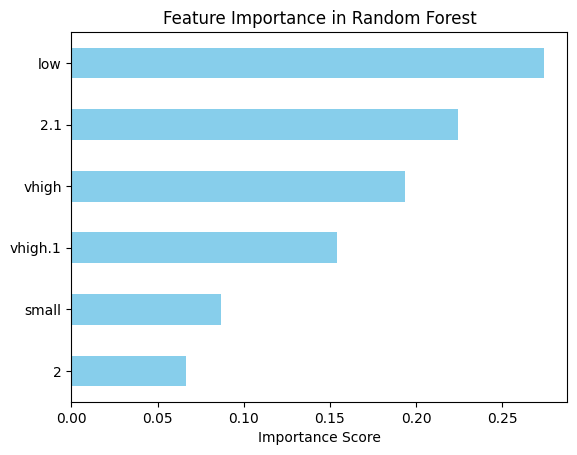

In [18]:
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.show()
